In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
from scipy.optimize import minimize

In [3]:
start_date = "2020-01-01"
end_date = "2024-09-30"

# symbols = ['KO', 'AMZN', 'UNH', 'AAPL']

# stock_data = yf.download(symbols, start=start_date, end=end_date)

# df = pd.DataFrame(stock_data)

First, classic ALL WEATHER PORTFOLIO (RAY DALIO) usually for US investors

In [4]:
TLT = yf.download('TLT', start=start_date, end=end_date)
IEF = yf.download('IEF', start=start_date, end=end_date)
DBC = yf.download('DBC', start=start_date, end=end_date)
GLD = yf.download('GLD', start=start_date, end=end_date)
VTI = yf.download('VTI', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
for df in (TLT, IEF, DBC, GLD, VTI):
	df['Normed Return'] = df['Adj Close'] /df.iloc[0]['Adj Close']

In [6]:
for df, allo in zip((TLT, IEF, DBC, GLD, VTI),[.4,.15,.075,.075,.3]):
	df['Allocation'] = df['Normed Return']*allo

Every asset has normalized returns and weights (%of allocaion)

In [7]:
TLT.head()

Price,Adj Close,Close,High,Low,Open,Volume,Normed Return,Allocation
Ticker,TLT,TLT,TLT,TLT,TLT,TLT,,
Date,,,,,,,,
2020-01-02 00:00:00+00:00,121.470497,137.009995,137.529999,136.669998,136.789993,11034100,1.000000,0.400000
2020-01-03 00:00:00+00:00,123.341148,139.119995,139.160004,137.880005,138.270004,12366000,1.015400,0.406160
2020-01-06 00:00:00+00:00,122.640800,138.330002,139.710007,138.149994,139.690002,11369800,1.009634,0.403854
2020-01-07 00:00:00+00:00,122.037849,137.649994,138.470001,137.639999,138.220001,8381200,1.004671,0.401868
2020-01-08 00:00:00+00:00,121.231117,136.740005,138.309998,136.320007,137.929993,10621700,0.998029,0.399212


1000000 is assumed the money invested

In [8]:
for df in (TLT, IEF, DBC, GLD, VTI):
	df['Position Value'] = df['Allocation']*1000000

In [9]:
all_pos_vals = [TLT['Position Value'], IEF['Position Value'], DBC['Position Value'], GLD['Position Value'], VTI['Position Value']]

portfolio_val = pd.concat(all_pos_vals, axis=1)

portfolio_val.columns = ['TLT', 'IEF', 'DBC', 'GLD', 'VTI']

portfolio_val['Total'] = portfolio_val.sum(axis=1)

Portfolio value (taking into consideration dividens and splits)

<Axes: xlabel='Date'>

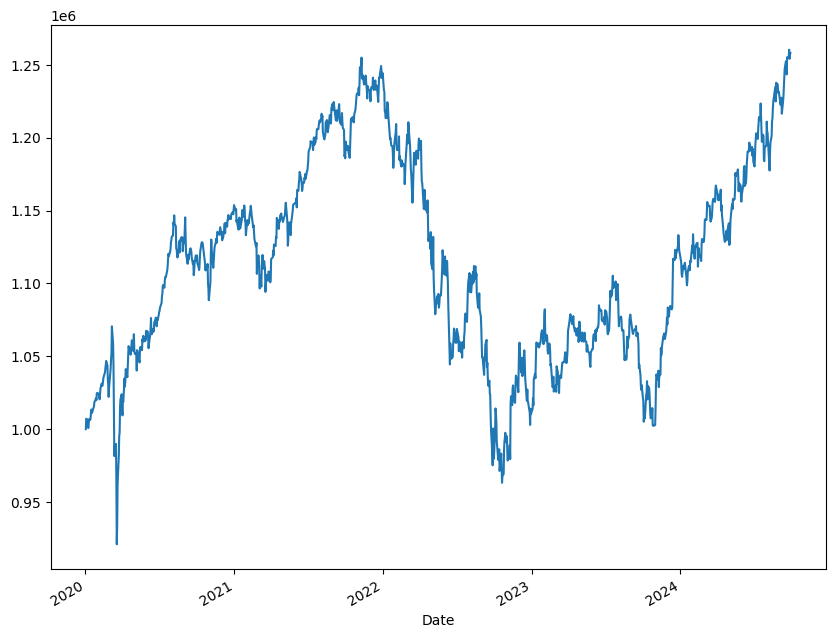

In [10]:
portfolio_val['Total'].plot(figsize=(10,8))

all the asset class

<Axes: xlabel='Date'>

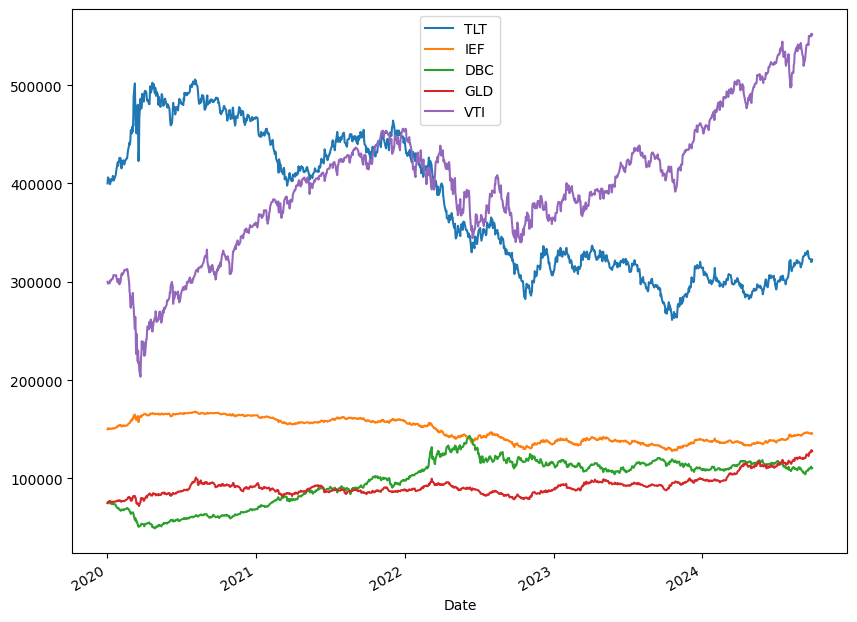

In [11]:
portfolio_val.drop('Total',axis=1).plot(figsize=(10,8))

Daily return

In [12]:
portfolio_val['Daily Return'] = portfolio_val['Total'].pct_change(1)
portfolio_val['Daily Return'].mean()


0.00021421228791435797

Volatily of the daily return

In [13]:
portfolio_val['Daily Return'].std()

0.006555821660459037

<Axes: ylabel='Frequency'>

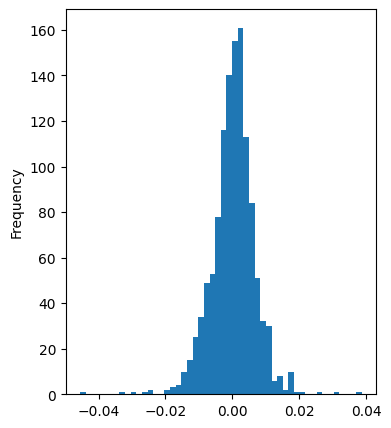

In [14]:
portfolio_val['Daily Return'].plot(kind='hist', bins=50, figsize=(4,5))

total portfolio return: 25.82%

In [15]:
cum_return = 100 * (portfolio_val['Total'][-1]/portfolio_val['Total'][0] - 1)
print(cum_return)

25.820401004248072


<ipython-input-15-419d8a947b62>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cum_return = 100 * (portfolio_val['Total'][-1]/portfolio_val['Total'][0] - 1)


In [16]:
sharpe_ratio = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()
print(sharpe_ratio)

0.03267512434121932


ANNUAL SHARPE RATIO: 0.518

In [17]:
ASR = (252**0.5) * sharpe_ratio
print(ASR)

0.5187015183898773


**Monte Carlo Simulation for Portfolio Optimization**

In [18]:
tickers = ['TLT', 'IEF', 'DBC', 'GLD', 'VTI']

data = yf.download(tickers, start=start_date, end=end_date)

[*********************100%***********************]  5 of 5 completed


In [19]:
portfoliox_prices = data["Adj Close"].dropna()

In [20]:
portfoliox_prices

Ticker,DBC,GLD,IEF,TLT,VTI
Date,,,,,
2020-01-02 00:00:00+00:00,15.130629,143.949997,100.588127,121.470497,153.396149
2020-01-03 00:00:00+00:00,15.310642,145.860001,101.260406,123.341148,152.419861
2020-01-06 00:00:00+00:00,15.339067,147.389999,101.151367,122.640800,152.940582
2020-01-07 00:00:00+00:00,15.329592,147.970001,101.006027,122.037849,152.577911
2020-01-08 00:00:00+00:00,15.102205,146.860001,100.769852,121.231117,153.331039
...,...,...,...,...,...
2024-09-23 00:00:00+00:00,22.230000,242.679993,97.770325,98.021309,281.292206
2024-09-24 00:00:00+00:00,22.600000,246.070007,97.879662,98.001442,282.000031
2024-09-25 00:00:00+00:00,22.410000,245.729996,97.482056,97.186836,281.072876


In [21]:
portfoliox_prices.pct_change(1).mean()

,0
Ticker,
DBC,0.000408
GLD,0.000494
IEF,-0.000011
TLT,-0.000116
VTI,0.000607


In [22]:
portfoliox_prices.pct_change(1).head()

Ticker,DBC,GLD,IEF,TLT,VTI
Date,,,,,
2020-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00+00:00,0.011897,0.013269,0.006683,0.015400,-0.006364
2020-01-06 00:00:00+00:00,0.001857,0.010490,-0.001077,-0.005678,0.003416
2020-01-07 00:00:00+00:00,-0.000618,0.003935,-0.001437,-0.004916,-0.002371
2020-01-08 00:00:00+00:00,-0.014833,-0.007502,-0.002338,-0.006611,0.004936


In [23]:
log_return = np.log(portfoliox_prices/portfoliox_prices.shift(1))

In [24]:
log_return

Ticker,DBC,GLD,IEF,TLT,VTI
Date,,,,,
2020-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00+00:00,0.011827,0.013181,0.006661,0.015283,-0.006385
2020-01-06 00:00:00+00:00,0.001855,0.010435,-0.001077,-0.005694,0.003411
2020-01-07 00:00:00+00:00,-0.000618,0.003927,-0.001438,-0.004929,-0.002374
2020-01-08 00:00:00+00:00,-0.014944,-0.007530,-0.002341,-0.006632,0.004924
...,...,...,...,...,...
2024-09-23 00:00:00+00:00,0.000450,0.001939,-0.000610,-0.002126,0.002484
2024-09-24 00:00:00+00:00,0.016507,0.013872,0.001118,-0.000203,0.002513
2024-09-25 00:00:00+00:00,-0.008443,-0.001383,-0.004070,-0.008347,-0.003293


*Single Random Allocation*

In [25]:
print(portfoliox_prices.columns)

weights = np.array(np.random.random(5))
print('Random Weights:')
print(weights)

print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

print('Expected Portfolio Return')
exp_ret = np.sum((log_return.mean()*weights)*252)
print(exp_ret)

print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))
print(exp_vol)

print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Index(['DBC', 'GLD', 'IEF', 'TLT', 'VTI'], dtype='object', name='Ticker')
Random Weights:
[0.32173355 0.1185543  0.74402069 0.24040804 0.1056259 ]
Rebalance
[0.21023631 0.07746913 0.48617921 0.15709428 0.06902108]
Expected Portfolio Return
0.024830928132116094
Expected Volatility
0.08360761742512705
Sharpe Ratio
0.29699361011396935


Monte Carlo Simulations - run 5000 times, so 5000 possible results and combinations

In [76]:
num_ports = 5000
all_weights = np.zeros((num_ports, len(portfoliox_prices.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)


    all_weights[ind,:] = weights


    ret_arr[ind] = np.sum((log_return.mean()*weights)*252)


    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))


    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

maximum Sharpe Ratio:

In [77]:
sharpe_arr.max()

0.8456207941351738

location of the maximum Sharpe Ratio

In [78]:
Location1 = sharpe_arr.argmax()

In [79]:
Location1

4002

optimal allocation out of the 5000 random allocations



In [80]:
all_weights[Location1,:]

array([0.09903144, 0.50211496, 0.02669268, 0.00637146, 0.36578946])

safety check

In [81]:
all_weights[Location1,:].sum()

0.9999999999999998

 volatility array, the return array, and color it by the Sharpe Ratio

Text(0, 0.5, 'Return')

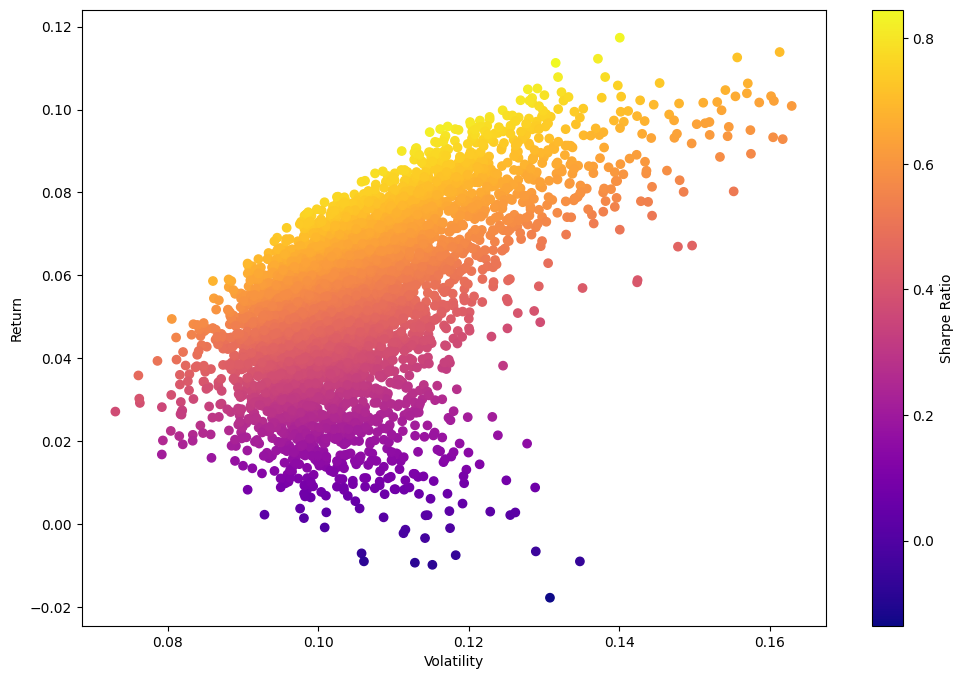

In [82]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

In [83]:
max_sr_ret = ret_arr[Location1]
max_sr_vol = vol_arr[Location1]

location of the maximum Sharpe Ratio

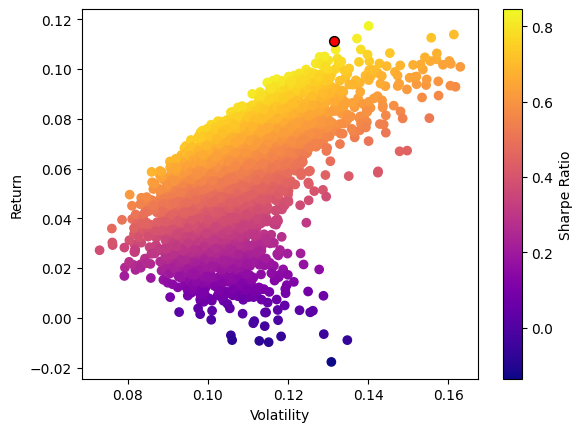

In [84]:
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# add a red dot for max_sr_vol & max_sr_ret
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, edgecolors='black')

**Optimization Algorithm**

now for finding the best portfolio i am gonna use a mathematical optimization algorithm (SciPy) instead of random allocations monte carlo.

1. def function that takes weights and returns returns, volatility, Sharpe Ratio.

2. def a fun that takes in weights and returns the sharpe ratio from get_ret_vol_sr function

multiplied by [-1] cause the aim is to minimize the negative Sharpe Ratio

3. def a fun for constrains, so the algorithm run smoother

4. def check sum for safety check

5. the bounds variable

6. the initial guess for start (equal weight)

7. optimize function from SciPy

In [85]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_return.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * 252, weights)))
    sr = ret / vol
    return np.array([ret, vol, sr])


def neg_sharpe(weights):
	return get_ret_vol_sr(weights)[2] * -1


def check_sum(weights):
	return np.sum(weights) - 1


cons = ({'type':'eq','fun':check_sum})


bounds = ((0,1),(0,1),(0,1),(0,1),(0,1))

init_guess = [0.2, 0.2, 0.2, 0.2, 0.2]

In [98]:
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

Algo result

In [99]:
opt_results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.8653646143472002
       x: [ 2.779e-02  6.422e-01  0.000e+00  0.000e+00  3.300e-01]
     nit: 5
     jac: [-3.127e-04 -6.754e-04  1.547e-01  4.678e-01  1.335e-03]
    nfev: 31
    njev: 5

In [100]:
optimized_weights_percent = opt_results.x * 100


print("Optimized weights in percentage:")
for weight in optimized_weights_percent:
    print(f"{weight:.2f}%")

Optimized weights in percentage:
2.78%
64.22%
0.00%
0.00%
33.00%


In [101]:
portfolio_returnx, portfolio_volatilityx, portfolio_sharpe_ratiox = get_ret_vol_sr(opt_results.x)

print(f"Portfolio Performance Metrics:")
print(f"  - Return: {portfolio_returnx*100:.2f}%")
print(f"  - Volatility: {portfolio_volatilityx*100:.2f}%")
print(f"  - Sharpe Ratio: {portfolio_sharpe_ratiox:.2f}")

Portfolio Performance Metrics:
  - Return: 11.70%
  - Volatility: 13.52%
  - Sharpe Ratio: 0.87


SECOND PORTFOLIO, ALL WEATHER FOR EUROPEAN INVESTORS

ITPS.L   0.1

IBGX.SW  0.15

US10.PA  0.1

IBCI.DE  0.1

IBGL.MI 0.1

SGLD.MI 0.075

SWRD.AS  0.3

CMOD.L   0.075

yahoo finance sources: note, in yahoo finance the source of price data of these etfs have low quality ( see portfolio value)

In [46]:
ITPS = yf.download('ITPS.L', start=start_date, end=end_date)
IBGX = yf.download('IBGX.SW', start=start_date, end=end_date)
US10 = yf.download('US10.PA', start=start_date, end=end_date)
IBCI = yf.download('IBCI.DE', start=start_date, end=end_date)
IBGL = yf.download('IBGL.MI', start=start_date, end=end_date)
SGLD = yf.download('SGLD.MI', start=start_date, end=end_date)
SWRD = yf.download('SWRD.AS', start=start_date, end=end_date)
CMOD = yf.download('CMOD.L', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [47]:
ITPS.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ITPS.L,ITPS.L,ITPS.L,ITPS.L,ITPS.L,ITPS.L
Date,,,,,,
2020-01-02 00:00:00+00:00,167.845001,167.845001,168.119995,166.122192,166.770004,698
2020-01-03 00:00:00+00:00,169.475006,169.475006,169.830002,169.261398,169.679993,1595
2020-01-06 00:00:00+00:00,168.270004,168.270004,169.900696,168.559998,169.850006,11457
2020-01-07 00:00:00+00:00,168.434998,168.434998,168.740158,167.330002,168.350006,682
2020-01-08 00:00:00+00:00,168.500000,168.500000,168.500000,168.130005,168.210007,609


In [48]:
for datab in (ITPS, IBGX, US10, IBCI, IBGL,SGLD, SWRD, CMOD ):
	datab['Normed Return'] = datab['Adj Close'] /datab.iloc[0]['Adj Close']

In [49]:
for datab, allo in zip((ITPS, IBGX, US10, IBCI, IBGL,SGLD, SWRD, CMOD),[.1,.15,.1,.1,.1,0.075,0.3,0.075]):
	datab['Allocation'] = datab['Normed Return']*allo


In [50]:
for datab in (ITPS, IBGX, US10, IBCI, IBGL,SGLD, SWRD, CMOD):
	datab['Position Value'] = datab['Allocation']*1000000


In [51]:
all_pos_vals_2 = [ITPS['Position Value'], IBGX['Position Value'], US10['Position Value'], IBCI['Position Value'], IBGL['Position Value'],
                SGLD['Position Value'], SWRD['Position Value'], CMOD['Position Value']]

portfolio_val_2 = pd.concat(all_pos_vals_2, axis=1)

portfolio_val_2.columns = ['ITPS', 'IBGX', 'US10', 'IBCI', 'IBGL', 'SGLD', 'SWRD', 'CMOD']

portfolio_val_2['Total'] = portfolio_val_2.sum(axis=1)

<Axes: xlabel='Date'>

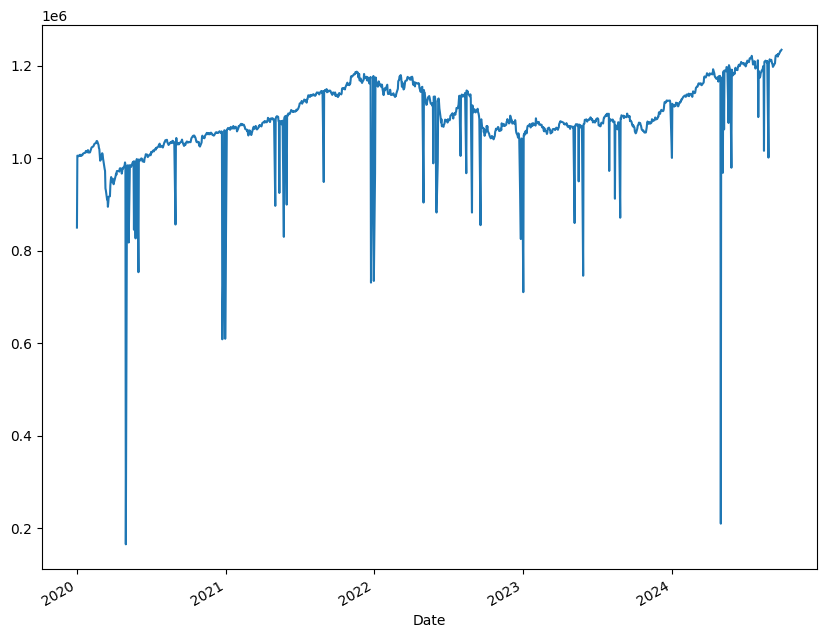

In [52]:
portfolio_val_2['Total'].plot(figsize=(10,8))

<Axes: xlabel='Date'>

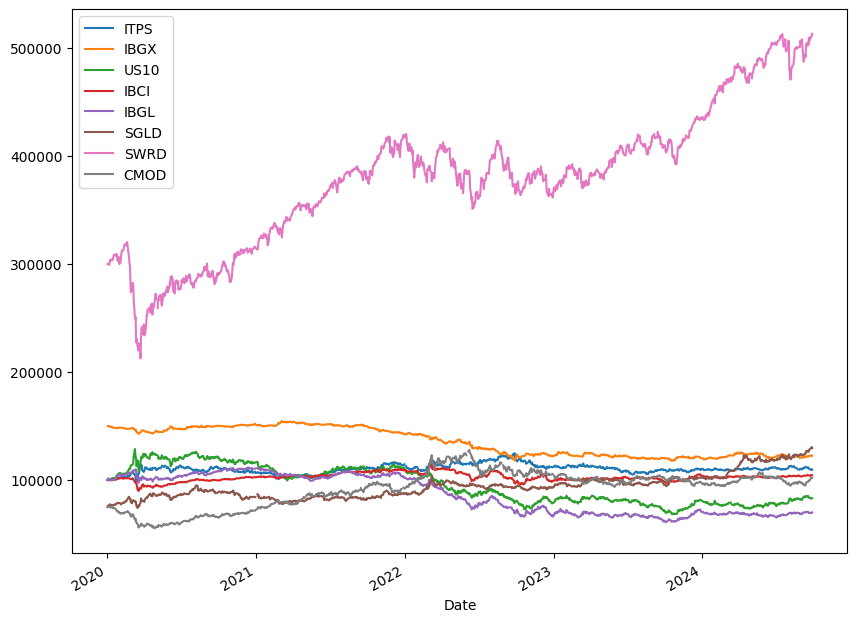

In [53]:
portfolio_val_2.drop('Total',axis=1).plot(figsize=(10,8))

In [54]:
portfolio_val_2['Daily Return'] = portfolio_val_2['Total'].pct_change(1)
portfolio_val_2['Daily Return'].mean()

0.008553048265083955

In [55]:
portfolio_val_2['Daily Return'].std()

0.2037872538297973

<Axes: ylabel='Frequency'>

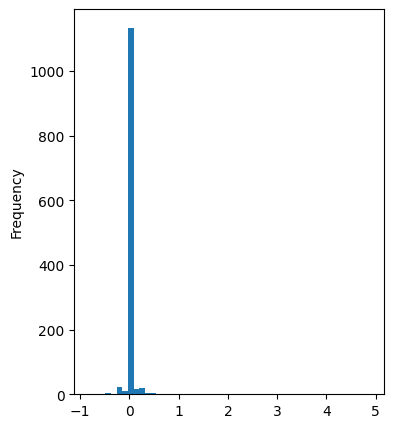

In [56]:
portfolio_val_2['Daily Return'].plot(kind='hist', bins=50, figsize=(4,5))

In [57]:
cum_returnx = 100 * (portfolio_val_2['Total'][-1]/portfolio_val_2['Total'][0] - 1)
print(cum_returnx)

45.19972282463263


<ipython-input-57-c0b779144c55>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cum_returnx = 100 * (portfolio_val_2['Total'][-1]/portfolio_val_2['Total'][0] - 1)


In [58]:
sharpe_ratiox = portfolio_val_2['Daily Return'].mean() / portfolio_val_2['Daily Return'].std()
print(sharpe_ratiox)

0.0419704770752122


In [59]:
ASRx = (252**0.5) * sharpe_ratiox
print(ASRx)

0.6662606684864941


In [60]:
tickersx = ['ITPS.L', 'IBGX.SW', 'US10.PA', 'IBCI.DE', 'IBGL.MI', 'SGLD.MI','SWRD.AS','CMOD.L']
datax = yf.download(tickersx, start=start_date, end=end_date)

[*********************100%***********************]  8 of 8 completed


In [61]:
portfoliox_pricesx = datax["Adj Close"].dropna()
portfoliox_pricesx

Ticker,CMOD.L,IBCI.DE,IBGL.MI,IBGX.SW,ITPS.L,SGLD.MI,SWRD.AS,US10.PA
Date,,,,,,,,
2020-01-03 00:00:00+00:00,17.094999,220.600006,261.564575,185.946350,169.475006,134.570007,20.622999,137.515213
2020-01-06 00:00:00+00:00,17.152500,220.580002,261.289032,185.906891,168.270004,135.509995,20.570000,137.001633
2020-01-07 00:00:00+00:00,17.110001,220.199997,260.659271,185.532043,168.434998,136.710007,20.695999,137.081940
2020-01-08 00:00:00+00:00,17.022499,219.750000,259.822845,184.900711,168.500000,136.679993,20.771000,136.603561
2020-01-09 00:00:00+00:00,16.920000,219.449997,259.084839,184.900711,168.449997,135.520004,20.915001,135.114227
...,...,...,...,...,...,...,...,...
2024-09-23 00:00:00+00:00,22.877501,228.570007,180.195267,151.790421,184.259995,227.740005,35.054001,112.785004
2024-09-24 00:00:00+00:00,23.122499,229.669998,180.893936,151.824951,184.380005,228.619995,35.046001,113.068001
2024-09-25 00:00:00+00:00,23.163750,228.990005,179.673737,152.278702,184.470001,229.429993,35.067001,112.422997


In [62]:
portfoliox_pricesx.pct_change(1).mean()


,0
Ticker,
CMOD.L,0.000314
IBCI.DE,0.000046
IBGL.MI,-0.000275
IBGX.SW,-0.000168
ITPS.L,0.000092
SGLD.MI,0.000493
SWRD.AS,0.000518
US10.PA,-0.000114


In [63]:
portfoliox_pricesx.pct_change(1).head()

Ticker,CMOD.L,IBCI.DE,IBGL.MI,IBGX.SW,ITPS.L,SGLD.MI,SWRD.AS,US10.PA
Date,,,,,,,,
2020-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06 00:00:00+00:00,0.003364,-0.000091,-0.001053,-0.000212,-0.007110,0.006985,-0.002570,-0.003735
2020-01-07 00:00:00+00:00,-0.002478,-0.001723,-0.002410,-0.002016,0.000981,0.008856,0.006125,0.000586
2020-01-08 00:00:00+00:00,-0.005114,-0.002044,-0.003209,-0.003403,0.000386,-0.000220,0.003624,-0.003490
2020-01-09 00:00:00+00:00,-0.006021,-0.001365,-0.002840,0.000000,-0.000297,-0.008487,0.006933,-0.010903


In [64]:
log_returnx = np.log(portfoliox_pricesx/portfoliox_pricesx.shift(1))
log_returnx

Ticker,CMOD.L,IBCI.DE,IBGL.MI,IBGX.SW,ITPS.L,SGLD.MI,SWRD.AS,US10.PA
Date,,,,,,,,
2020-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06 00:00:00+00:00,0.003358,-0.000091,-0.001054,-0.000212,-0.007136,0.006961,-0.002573,-0.003742
2020-01-07 00:00:00+00:00,-0.002481,-0.001724,-0.002413,-0.002018,0.000980,0.008817,0.006107,0.000586
2020-01-08 00:00:00+00:00,-0.005127,-0.002046,-0.003214,-0.003409,0.000386,-0.000220,0.003617,-0.003496
2020-01-09 00:00:00+00:00,-0.006040,-0.001366,-0.002844,0.000000,-0.000297,-0.008523,0.006909,-0.010962
...,...,...,...,...,...,...,...,...
2024-09-23 00:00:00+00:00,0.014807,0.000875,0.004159,-0.000877,-0.003738,0.005151,0.007272,-0.005200
2024-09-24 00:00:00+00:00,0.010652,0.004801,0.003870,0.000227,0.000651,0.003857,-0.000228,0.002506
2024-09-25 00:00:00+00:00,0.001782,-0.002965,-0.006768,0.002984,0.000488,0.003537,0.000599,-0.005721


In [65]:
print(portfoliox_pricesx.columns)

weightsx = np.array(np.random.random(8))
print('Random Weights:')
print(weightsx)

print('Rebalance')
weightsx = weightsx/np.sum(weightsx)
print(weightsx)

print('Expected Portfolio Return')
exp_retx = np.sum((log_returnx.mean()*weightsx)*252)
print(exp_retx)

print('Expected Volatility')
exp_volx = np.sqrt(np.dot(weightsx.T,np.dot(log_returnx.cov()*252, weightsx)))
print(exp_volx)

print('Sharpe Ratio')
SRx = exp_retx/exp_volx
print(SRx)


Index(['CMOD.L', 'IBCI.DE', 'IBGL.MI', 'IBGX.SW', 'ITPS.L', 'SGLD.MI',
       'SWRD.AS', 'US10.PA'],
      dtype='object', name='Ticker')
Random Weights:
[0.71994788 0.29409518 0.86328726 0.54700979 0.95036326 0.78705184
 0.6646264  0.65814171]
Rebalance
[0.131269   0.05362274 0.15740425 0.09973698 0.17328092 0.14350415
 0.12118216 0.1199998 ]
Expected Portfolio Return
0.020449978497706543
Expected Volatility
0.06882353530055114
Sharpe Ratio
0.2971364142862155


In [66]:
num_ports = 5000
all_weightsx = np.zeros((num_ports, len(portfoliox_pricesx.columns)))
ret_arrx = np.zeros(num_ports)
vol_arrx = np.zeros(num_ports)
sharpe_arrx = np.zeros(num_ports)

for ind in range(num_ports):

    weightsx = np.array(np.random.random(8))
    weightsx = weightsx/np.sum(weightsx)

    all_weightsx[ind,:] = weightsx


    ret_arrx[ind] = np.sum((log_returnx.mean()*weightsx)*252)


    vol_arrx[ind] = np.sqrt(np.dot(weightsx.T,np.dot(log_returnx.cov()*252, weightsx)))


    sharpe_arrx[ind] = ret_arrx[ind]/vol_arrx[ind]


In [103]:
Location2 = sharpe_arrx.argmax()
print(sharpe_arrx.max())
print(sharpe_arrx.argmax())


0.8480082465907
2068


In [104]:
print(all_weightsx[Location2,:])
print(all_weightsx[Location2,:].sum())

[0.02768099 0.02014057 0.0128962  0.14110333 0.25375597 0.26095553
 0.28237214 0.00109527]
1.0000000000000002


Text(0, 0.5, 'Return')

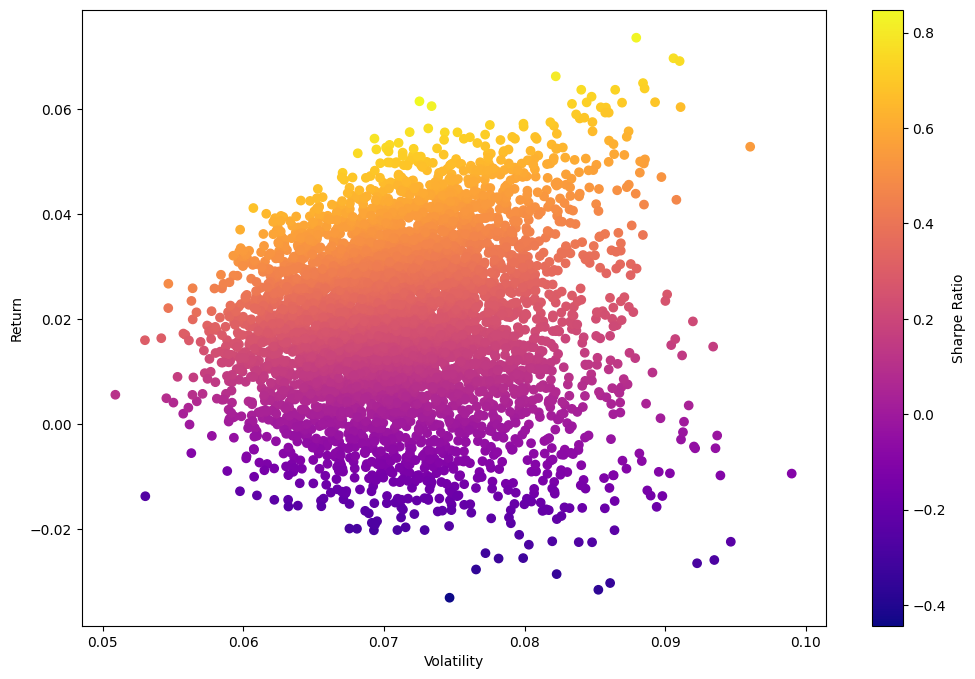

In [105]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arrx,ret_arrx,c=sharpe_arrx,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')


In [106]:
max_sr_retx = ret_arrx[Location2]
max_sr_volx = vol_arrx[Location2]

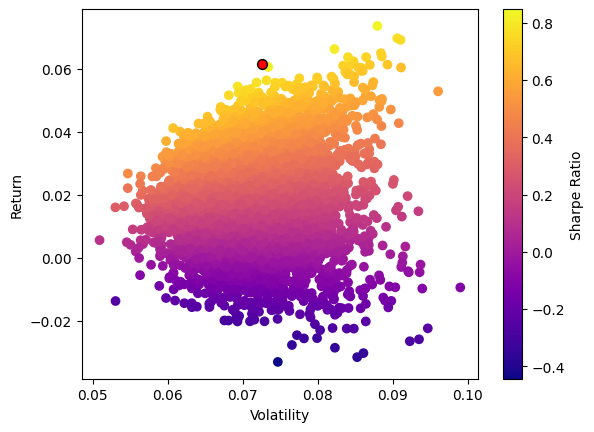

In [107]:
plt.scatter(vol_arrx,ret_arrx,c=sharpe_arrx,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_volx, max_sr_retx, c='red', s=50, edgecolors='black')


In [71]:
def get_ret_vol_sr2(weightsx):
    weightsx = np.array(weightsx)
    retx = np.sum(log_returnx.mean() * weightsx) * 252
    volx = np.sqrt(np.dot(weightsx.T, np.dot(log_returnx.cov() * 252, weightsx)))
    srx = retx / volx
    return np.array([retx, volx, srx])


def neg_sharpe2(weightsx):
	return get_ret_vol_sr2(weightsx)[2] * -1


def check_sum(weights):
	return np.sum(weights) - 1


cons = ({'type':'eq','fun':check_sum})

boundsx = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))

init_guessx = [0.125, 0.125, 0.125, 0.125, 0.125,0.125,0.125,0.125]


In [108]:
opt_resultsx = minimize(neg_sharpe2, init_guessx, method='SLSQP', bounds=boundsx, constraints=cons)
opt_resultsx

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.0298067433116285
       x: [ 2.201e-17  0.000e+00  7.415e-17  8.024e-17  8.882e-02
            5.414e-01  3.697e-01  1.464e-17]
     nit: 7
     jac: [ 1.482e-01  2.314e-01  1.073e+00  4.463e-01 -1.169e-03
           -1.958e-05  3.060e-04  5.027e-01]
    nfev: 64
    njev: 7

In [109]:
optimized_weights_percentx = opt_resultsx.x * 100
print("Optimized weights in percentage:")
for weight in optimized_weights_percentx:
    print(f"{weight:.2f}%")


Optimized weights in percentage:
0.00%
0.00%
0.00%
0.00%
8.88%
54.14%
36.97%
0.00%


In [74]:
log_returnx.head()

Ticker,CMOD.L,IBCI.DE,IBGL.MI,IBGX.SW,ITPS.L,SGLD.MI,SWRD.AS,US10.PA
Date,,,,,,,,
2020-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06 00:00:00+00:00,0.003358,-0.000091,-0.001054,-0.000212,-0.007136,0.006961,-0.002573,-0.003742
2020-01-07 00:00:00+00:00,-0.002481,-0.001724,-0.002413,-0.002018,0.000980,0.008817,0.006107,0.000586
2020-01-08 00:00:00+00:00,-0.005127,-0.002046,-0.003214,-0.003409,0.000386,-0.000220,0.003617,-0.003496
2020-01-09 00:00:00+00:00,-0.006040,-0.001366,-0.002844,0.000000,-0.000297,-0.008523,0.006909,-0.010962


In [75]:
portfolio_returnx2, portfolio_volatilityx2, portfolio_sharpe_ratiox2 = get_ret_vol_sr2(opt_resultsx.x)


print(f"Portfolio Performance Metrics:")
print(f"  - Return: {portfolio_returnx2*100:.2f}%")
print(f"  - Volatility: {portfolio_volatilityx2*100:.2f}%")
print(f"  - Sharpe Ratio: {portfolio_sharpe_ratiox2:.2f}")


Portfolio Performance Metrics:
  - Return: 10.60%
  - Volatility: 10.30%
  - Sharpe Ratio: 1.03
